In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sps
import json
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from datetime import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

url = "http://api.openweathermap.org/data/2.5/weather?"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
# Setting up dataframe of target cities
cities_df = pd.DataFrame(data=cities)
cities_df["City"] = cities
cities_df["Country"] = countries
cities_df = cities_df.drop([0], axis = 1)
cities_df = cities_df.drop_duplicates()
cities_df

,City,Country
0,bambous virieux,mu
1,albany,au
2,yellowknife,ca
3,roma,au
4,kahului,us
...,...,...
617,lazaro cardenas,mx
618,pacifica,us
619,taltal,cl
620,road town,vg


In [4]:
# Set variables lists to store data
all_cities = []
all_countries = []
lats = []
lons = []
max_temps = []
humidities = []
clouds = []
wind_speeds = []
dates = []


for index, row in cities_df.iterrows():
     
        try:
            city = row["City"]
            country = row["Country"]
            city_num = index + 1
            query_url = f"{url}q={city}&{country}&appid={api_key}" # Input city and country for api request...
            current_weather = requests.get(query_url) # to get current weather data...
            weather_json = current_weather.json() # and convert it into a json object
            
            lat = weather_json["coord"]["lat"]   
            lon = weather_json["coord"]["lon"] 
            k_temp = weather_json["main"]["temp_max"] 
            max_temp = (k_temp - 273.15) * 9/5 + 32   # Converting the max temperature from Kelvin to Fahrenheit       
            humidity = weather_json["main"]["humidity"]
            cloudiness = weather_json["clouds"]["all"]
            wind_speed = weather_json["wind"]["speed"] 
            unix_date = weather_json["dt"]
            reg_date = datetime.utcfromtimestamp(unix_date).strftime('%Y-%m-%d') # changing 'dt' from unix datetime formate
            
            # Appending all our chosen variables to lists above
            
            lats.append(lat)
            lons.append(lon)
            max_temps.append(max_temp)
            humidities.append(humidity)
            clouds.append(cloudiness)
            wind_speeds.append(wind_speed)
            dates.append(reg_date)
            all_cities.append(city)
            all_countries.append(country)            
         
            print(f"Retrieving Results for city #{city_num} : {city}, {country}")
        except:
            print("unable to locate city. skipping...")

Retrieving Results for city #1 : bambous virieux, mu
Retrieving Results for city #2 : albany, au
Retrieving Results for city #3 : yellowknife, ca
Retrieving Results for city #4 : roma, au
Retrieving Results for city #5 : kahului, us
unable to locate city. skipping...
Retrieving Results for city #7 : ushuaia, ar
Retrieving Results for city #8 : mar del plata, ar
Retrieving Results for city #9 : yima, cn
Retrieving Results for city #10 : psebay, ru
Retrieving Results for city #11 : mataura, pf
unable to locate city. skipping...
Retrieving Results for city #13 : butaritari, ki
Retrieving Results for city #14 : hithadhoo, mv
Retrieving Results for city #15 : saint-philippe, re
Retrieving Results for city #16 : vila franca do campo, pt
Retrieving Results for city #17 : talcahuano, cl
Retrieving Results for city #18 : bluff, nz
Retrieving Results for city #19 : kapaa, us
Retrieving Results for city #20 : havoysund, no
Retrieving Results for city #21 : taoudenni, ml
Retrieving Results for cit

Retrieving Results for city #175 : carnarvon, au
Retrieving Results for city #176 : muravlenko, ru
Retrieving Results for city #177 : saldanha, za
Retrieving Results for city #178 : port blair, in
Retrieving Results for city #179 : amazar, ru
unable to locate city. skipping...
Retrieving Results for city #181 : aklavik, ca
Retrieving Results for city #182 : tasiilaq, gl
Retrieving Results for city #183 : sisimiut, gl
Retrieving Results for city #184 : jacqueville, ci
Retrieving Results for city #185 : ginir, et
Retrieving Results for city #186 : karratha, au
Retrieving Results for city #187 : broome, au
Retrieving Results for city #188 : zolochiv, ua
Retrieving Results for city #189 : nuuk, gl
Retrieving Results for city #190 : dunedin, nz
Retrieving Results for city #191 : touros, br
Retrieving Results for city #192 : makakilo city, us
Retrieving Results for city #193 : pisco, pe
Retrieving Results for city #194 : sobolevo, ru
Retrieving Results for city #195 : broken hill, au
Retriev

Retrieving Results for city #351 : bago, mm
Retrieving Results for city #352 : vestmanna, fo
Retrieving Results for city #353 : te anau, nz
Retrieving Results for city #354 : kavaratti, in
Retrieving Results for city #355 : sola, vu
Retrieving Results for city #356 : waimana, nz
Retrieving Results for city #357 : ahipara, nz
Retrieving Results for city #358 : kununurra, au
Retrieving Results for city #359 : wagar, sd
Retrieving Results for city #360 : saint george, bm
unable to locate city. skipping...
Retrieving Results for city #362 : shima, cn
Retrieving Results for city #363 : korla, cn
Retrieving Results for city #364 : fulton, us
Retrieving Results for city #365 : qiqihar, cn
Retrieving Results for city #366 : chipinge, zw
Retrieving Results for city #367 : tiksi, ru
unable to locate city. skipping...
Retrieving Results for city #369 : boditi, et
Retrieving Results for city #370 : setermoen, no
unable to locate city. skipping...
Retrieving Results for city #372 : ouadda, cf
Retri

unable to locate city. skipping...
Retrieving Results for city #527 : zelenoborsk, ru
Retrieving Results for city #528 : cibitoke, bi
Retrieving Results for city #529 : callaguip, ph
Retrieving Results for city #530 : vao, nc
Retrieving Results for city #531 : coos bay, us
Retrieving Results for city #532 : obihiro, jp
Retrieving Results for city #533 : hassleholm, se
Retrieving Results for city #534 : retiro, co
Retrieving Results for city #535 : oktyabrskiy, ru
Retrieving Results for city #536 : aanekoski, fi
Retrieving Results for city #537 : toba tek singh, pk
Retrieving Results for city #538 : surab, pk
Retrieving Results for city #539 : deep river, ca
unable to locate city. skipping...
Retrieving Results for city #541 : rumoi, jp
Retrieving Results for city #542 : cumberland, us
Retrieving Results for city #543 : rawson, ar
Retrieving Results for city #544 : matara, lk
Retrieving Results for city #545 : nizhnyaya tavda, ru
unable to locate city. skipping...
unable to locate city.

In [5]:
json.dumps(weather_json, indent=2, sort_keys=True)

'{\n  "base": "stations",\n  "clouds": {\n    "all": 100\n  },\n  "cod": 200,\n  "coord": {\n    "lat": 53.6167,\n    "lon": 109.6167\n  },\n  "dt": 1614624891,\n  "id": 2027109,\n  "main": {\n    "feels_like": 247.37,\n    "grnd_level": 952,\n    "humidity": 84,\n    "pressure": 1019,\n    "sea_level": 1019,\n    "temp": 252.46,\n    "temp_max": 252.46,\n    "temp_min": 252.46\n  },\n  "name": "Barguzin",\n  "sys": {\n    "country": "RU",\n    "sunrise": 1614641274,\n    "sunset": 1614680393\n  },\n  "timezone": 28800,\n  "visibility": 5505,\n  "weather": [\n    {\n      "description": "overcast clouds",\n      "icon": "04n",\n      "id": 804,\n      "main": "Clouds"\n    }\n  ],\n  "wind": {\n    "deg": 68,\n    "speed": 2.03\n  }\n}'

In [6]:
# Zipping our lists together and adding column names in appropriate order to create dataframe of weather on specified date
weather_frame = pd.DataFrame(list(zip(all_cities, all_countries, lats, lons, max_temps, humidities,clouds,wind_speeds,dates)),
               columns =["city", "country", "lat", "lng", "max_temp (f)", "humidity (%)", "cloudiness (%)", "wind_speed (mph)", "date"])
weather_frame

,city,country,lat,lng,max_temp (f),humidity (%),cloudiness (%),wind_speed (mph),date
0,bambous virieux,mu,-20.3428,57.7575,77.000,88,75,7.16,2021-03-01
1,albany,au,42.6001,-73.9662,39.002,59,100,1.79,2021-03-01
2,yellowknife,ca,62.4560,-114.3525,-4.000,49,90,4.63,2021-03-01
3,roma,au,43.2128,-75.4557,33.998,60,90,11.32,2021-03-01
4,kahului,us,20.8947,-156.4700,73.400,68,40,8.75,2021-03-01
...,...,...,...,...,...,...,...,...,...
563,lazaro cardenas,mx,17.9583,-102.2000,81.806,57,0,4.22,2021-03-01
564,pacifica,us,37.6138,-122.4869,60.998,31,1,4.63,2021-03-01
565,taltal,cl,-25.4000,-70.4833,72.176,62,29,3.22,2021-03-01
566,road town,vg,18.4167,-64.6167,80.600,61,40,5.14,2021-03-01


In [7]:
weather_frame.to_csv("output_data/weather_csv", index=None)

In [8]:
weather_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city              568 non-null    object 
 1   country           568 non-null    object 
 2   lat               568 non-null    float64
 3   lng               568 non-null    float64
 4   max_temp (f)      568 non-null    float64
 5   humidity (%)      568 non-null    int64  
 6   cloudiness (%)    568 non-null    int64  
 7   wind_speed (mph)  568 non-null    float64
 8   date              568 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 40.1+ KB


In [9]:
weather_frame["humidity (%)"].sort_values(ascending=False)

187    100
445    100
426    100
111    100
277    100
      ... 
379     12
501     12
420     11
317      9
7        1
Name: humidity (%), Length: 568, dtype: int64

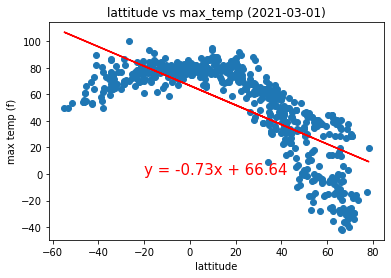

In [10]:
# Comparing lattitude with maximum temperature
the_lats = weather_frame["lat"]
date = weather_frame["date"][0]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(the_lats, max_temps)
regress_values = the_lats * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.scatter(the_lats, max_temps)
plt.plot(lats, regress_values, "r-")
plt.annotate(line_eq,(-20, 0),fontsize=15,color="red")
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title(f"lattitude vs max_temp ({date})")
plt.savefig("output_data/lattitude_vs_max_temp.png")

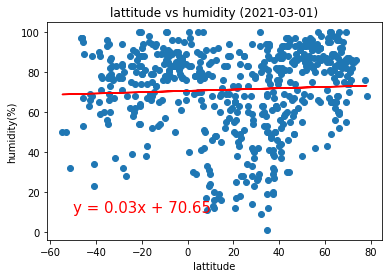

In [11]:
# Comparing lattitude with humidity
(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(lats, humidities)
regress_values = the_lats * slope + intercept

plt.scatter(lats, humidities)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("humidity(%)")
plt.title(f"lattitude vs humidity ({date})")
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-50, 10),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_humidity.png")

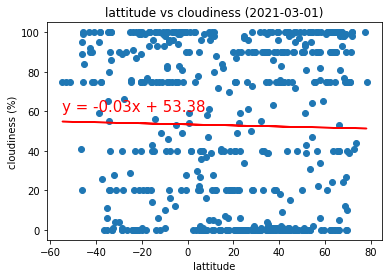

In [12]:
# Comparing lattitude with cloudiness %
(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(the_lats, clouds)
regress_values = the_lats * slope + intercept

plt.scatter(lats, clouds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("cloudiness (%)")
plt.title(f"lattitude vs cloudiness ({date})")
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_cloudiness.png")

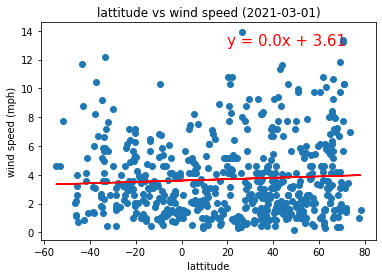

In [13]:
# Comparing lattitude with wind speed 
(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(the_lats, wind_speeds)
regress_values = the_lats * slope + intercept

plt.scatter(lats, wind_speeds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("wind speed (mph)")
plt.title(f"lattitude vs wind speed ({date})")
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(20,13),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_wind_speed.png")

In [14]:
# Breaking up dataset to analyze northern and southern hemisphers independantly...
northern_df = weather_frame[weather_frame["lat"] > 0]
northern_df

,city,country,lat,lng,max_temp (f),humidity (%),cloudiness (%),wind_speed (mph),date
1,albany,au,42.6001,-73.9662,39.002,59,100,1.79,2021-03-01
2,yellowknife,ca,62.4560,-114.3525,-4.000,49,90,4.63,2021-03-01
3,roma,au,43.2128,-75.4557,33.998,60,90,11.32,2021-03-01
4,kahului,us,20.8947,-156.4700,73.400,68,40,8.75,2021-03-01
7,yima,cn,34.7381,111.8839,41.000,1,0,0.94,2021-03-01
...,...,...,...,...,...,...,...,...,...
562,kalininskaya,ru,45.4822,38.6628,39.992,85,99,0.96,2021-03-01
563,lazaro cardenas,mx,17.9583,-102.2000,81.806,57,0,4.22,2021-03-01
564,pacifica,us,37.6138,-122.4869,60.998,31,1,4.63,2021-03-01
566,road town,vg,18.4167,-64.6167,80.600,61,40,5.14,2021-03-01


In [15]:
# ... and run the same analysis on each
southern_df = weather_frame[weather_frame["lat"] < 0]
southern_df

,city,country,lat,lng,max_temp (f),humidity (%),cloudiness (%),wind_speed (mph),date
0,bambous virieux,mu,-20.3428,57.7575,77.000,88,75,7.16,2021-03-01
5,ushuaia,ar,-54.8000,-68.3000,50.000,50,75,4.63,2021-03-01
6,mar del plata,ar,-38.0023,-57.5575,77.000,78,75,8.23,2021-03-01
9,mataura,pf,-46.1927,168.8643,53.996,97,20,1.19,2021-03-01
11,hithadhoo,mv,-0.6000,73.0833,82.472,66,28,3.94,2021-03-01
...,...,...,...,...,...,...,...,...,...
545,gizo,sb,-8.1030,156.8419,82.184,80,95,5.35,2021-03-01
548,mocuba,mz,-16.8392,36.9856,71.960,98,93,2.67,2021-03-01
552,kabwe,zm,-14.4469,28.4464,61.970,93,100,2.99,2021-03-01
556,kaniama,cd,-7.5667,24.1833,69.242,90,16,1.37,2021-03-01


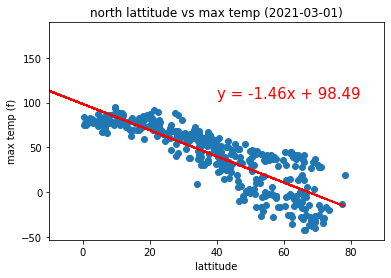

In [16]:
north_lats = northern_df["lat"]
north_temps = northern_df["max_temp (f)"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_temps)
regress_values = the_lats * slope + intercept

plt.scatter(north_lats, north_temps)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title(f"north lattitude vs max temp ({date})")
plt.xlim(-10, 90)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(40,105),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_north_temp.png")

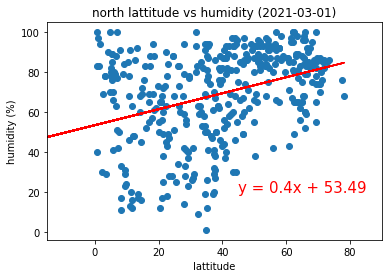

In [17]:
north_humidities = northern_df["humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_humidities)
regress_values = the_lats * slope + intercept

plt.scatter(north_lats, north_humidities)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("humidity (%)")
plt.title(f"north lattitude vs humidity ({date})")
plt.xlim(-15, 90)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(45, 20),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_north_humidity.png")

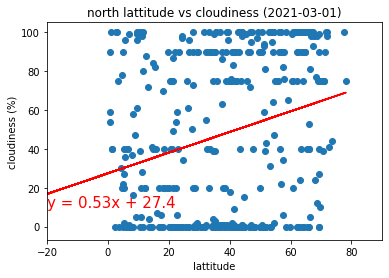

In [18]:
north_clouds = northern_df["cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_clouds)
regress_values = the_lats * slope + intercept
plt.scatter(north_lats, north_clouds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("cloudiness (%)")
plt.title(f"north lattitude vs cloudiness ({date})")
plt.xlim(-20, 90)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_noth_cloudiness.png")

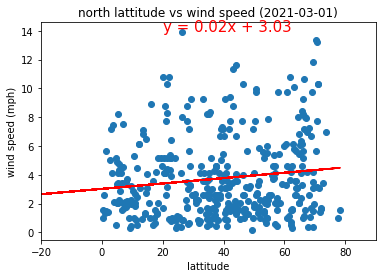

In [19]:
north_speeds = northern_df["wind_speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_speeds)
regress_values = the_lats * slope + intercept
plt.scatter(north_lats, north_speeds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("wind speed (mph)")
plt.title(f"north lattitude vs wind speed ({date})")
plt.xlim(-20, 90)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(20,14),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_north_speed.png")

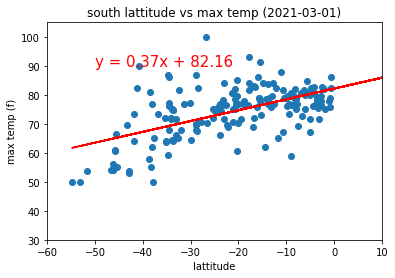

In [20]:
south_lats = southern_df["lat"]
south_temps = southern_df["max_temp (f)"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_temps)
regress_values = the_lats * slope + intercept

plt.scatter(south_lats, south_temps)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title(f"south lattitude vs max temp ({date})")
plt.xlim(-60,10)
plt.ylim(30,105)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_south_temp.png")

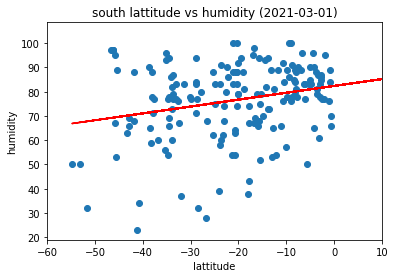

In [21]:
south_humidities = southern_df["humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_humidities)
regress_values = the_lats * slope + intercept

plt.scatter(south_lats, south_humidities)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("humidity")
plt.title(f"south lattitude vs humidity ({date})")
plt.xlim(-60,10)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_south_humidity.png")

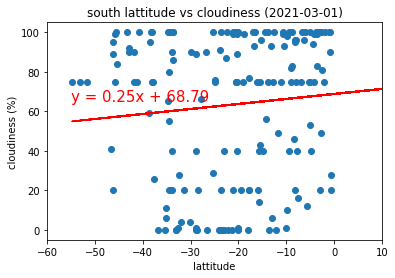

In [22]:
south_clouds = southern_df["cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_clouds)
regress_values = the_lats * slope + intercept

plt.scatter(south_lats, south_clouds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("cloudiness (%)")
plt.title(f"south lattitude vs cloudiness ({date})")
plt.xlim(-60,10)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-55,65),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_south_clouds.png")

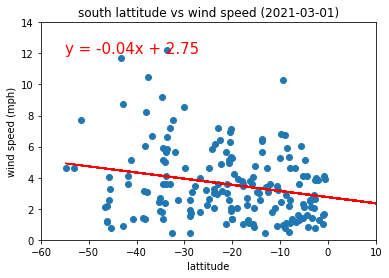

In [23]:
south_speeds = southern_df["wind_speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_speeds)
regress_values = the_lats * slope + intercept

plt.scatter(south_lats, south_speeds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("wind speed (mph)")
plt.title(f"south lattitude vs wind speed ({date})")
plt.xlim(-60,10)
plt.ylim(0,14)
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.annotate(line_eq,(-55,12),fontsize=15,color="red")
plt.savefig("output_data/lattitude_vs_south_speeds.png")